# Qcodes example with Rohde Schwarz ZN20

In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt

import qcodes as qc

In [2]:
import qcodes.instrument_drivers.rohde_schwarz.ZNB20 as vna

In [3]:
vna = vna.ZNB20('VNA', 'TCPIP0::192.168.15.100::inst0::INSTR', server_name=None)

Connected to: Rohde-Schwarz ZNB20-2Port (serial:1311601062101551, firmware:2.82) in 0.17s


In [4]:
station = qc.Station(vna)

The QCoDes driver for the Rohde Schwarz ZNB 20 is setup with 4 channels each containing one trace and reprecenting the 4 standars S parameters (S11, S12, S21 and S22). For each S parameter you can define a frequency sweep as and the power of the rf source i.e for s11 sweep from 100 KHz to 6 MHz in 100 steps:

In [5]:
vna.start11(100e3)
vna.stop11(6e6)
vna.npts11(100)

With a power of -30 dBm

In [6]:
vna.power11(-30)

Now we can meassure a frequency trace, first remembering to turn on the rf source. This produces both a linear magnitude and phase

In [7]:
vna.rf_on()
data = qc.Measure(vna.trace11).run()

DataSet:
   location = 'data/2017-05-24/#047_{name}_14-35-53'
   <Type>   | <array_id>        | <array.name>  | <array.shape>
   Setpoint | frequency_set     | frequency     | (100,)
   Measured | VNA_s11_magnitude | s11_magnitude | (100,)
   Measured | VNA_s11_phase     | s11_phase     | (100,)
acquired at 2017-05-24 14:35:53


<IPython.core.display.Javascript object>


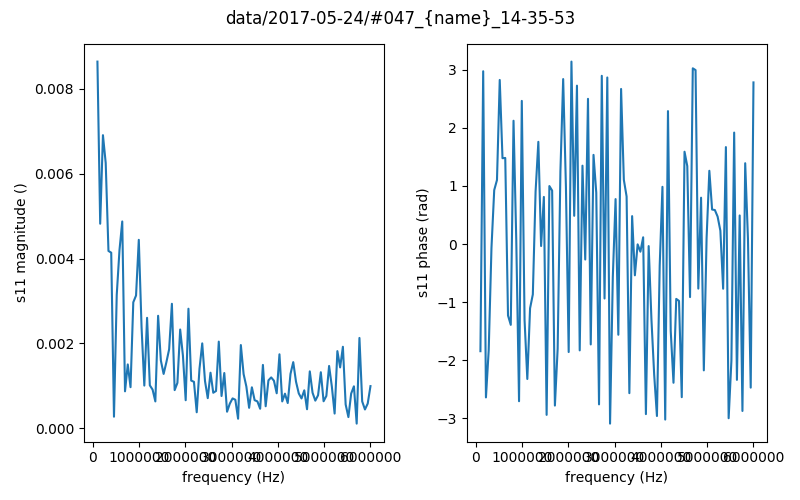

In [8]:
plot = qc.MatPlot(subplots=(1,2))
plot.add(data.VNA_s11_magnitude, subplot=1)
plot.add(data.VNA_s11_phase, subplot=2)
plot.fig.tight_layout(rect=(0, 0, 1, 0.95))

We can also define a frequency trace by setting the span and center frequency. 200 KHz windows centered around 1 MHZ

In [9]:
vna.span11(200e3)
vna.center11(1e6)
vna.npts11(100)

DataSet:
   location = 'data/2017-05-24/#048_{name}_14-35-56'
   <Type>   | <array_id>        | <array.name>  | <array.shape>
   Setpoint | frequency_set     | frequency     | (100,)
   Measured | VNA_s11_magnitude | s11_magnitude | (100,)
   Measured | VNA_s11_phase     | s11_phase     | (100,)
acquired at 2017-05-24 14:35:56


<IPython.core.display.Javascript object>


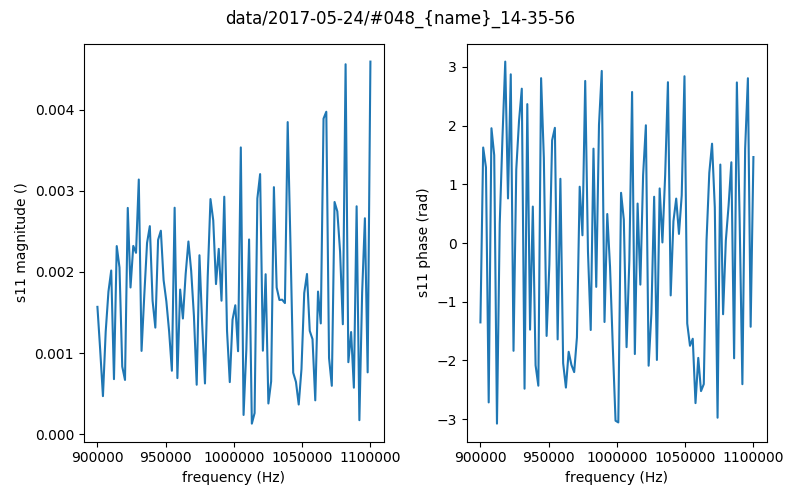

In [10]:
data = qc.Measure(vna.trace11).run()
plot = qc.MatPlot(subplots=(1,2))
plot.add(data.VNA_s11_magnitude, subplot=1)
plot.add(data.VNA_s11_phase, subplot=2)
plot.fig.tight_layout(rect=(0, 0, 1, 0.95))

We can also measure the magniture in dB.

DataSet:
   location = 'data/2017-05-24/#049_{name}_14-35-58'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_tracedb11 | tracedb11    | (100,)
acquired at 2017-05-24 14:35:58


<IPython.core.display.Javascript object>


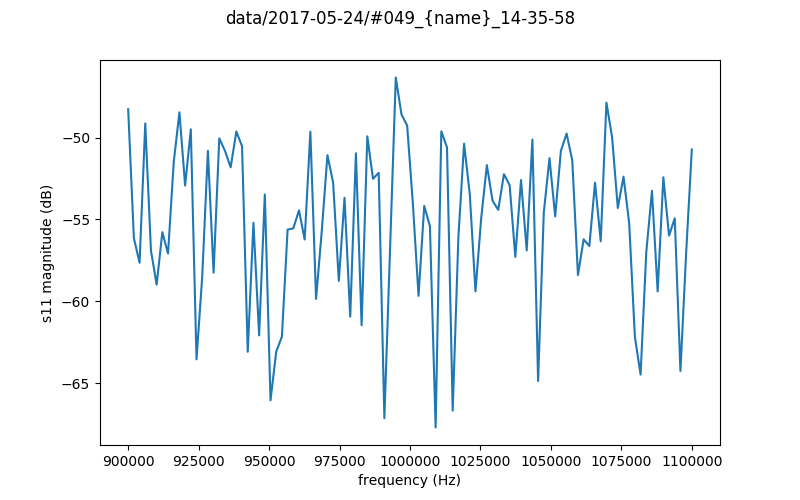

In [11]:
vna.rf_on()
data = qc.Measure(vna.tracedb11).run()
plot = qc.MatPlot(data.VNA_tracedb11)

We can display all 4 S parameters in a split view on the VNA display.

In [12]:
vna.display_sij_split()

Or we can display all 4 parameters in one view.

In [13]:
vna.display_sij_overlay()

We can autoscale the scale the y axis

In [14]:
vna.autoscale_all()

It is possible to switch the display update on and off

In [15]:
vna.update_display_on()

In [16]:
vna.update_display_off()

And switch the rf output on and off

In [17]:
vna.rf_on()

In [18]:
vna.rf_off()

Doing a 2D sweep is supported too

In [19]:
vna.rf_on()
data1 = qc.Loop(vna.power11.sweep(-15,-1,1)).each(vna.trace11).run()

Started at 2017-05-24 14:36:07
DataSet:
   location = 'data/2017-05-24/#050_{name}_14-36-07'
   <Type>   | <array_id>        | <array.name>  | <array.shape>
   Setpoint | VNA_power11_set   | power11       | (15,)
   Setpoint | frequency_set     | frequency     | (15, 100)
   Measured | VNA_s11_magnitude | s11_magnitude | (15, 100)
   Measured | VNA_s11_phase     | s11_phase     | (15, 100)
Finished at 2017-05-24 14:36:10


<IPython.core.display.Javascript object>


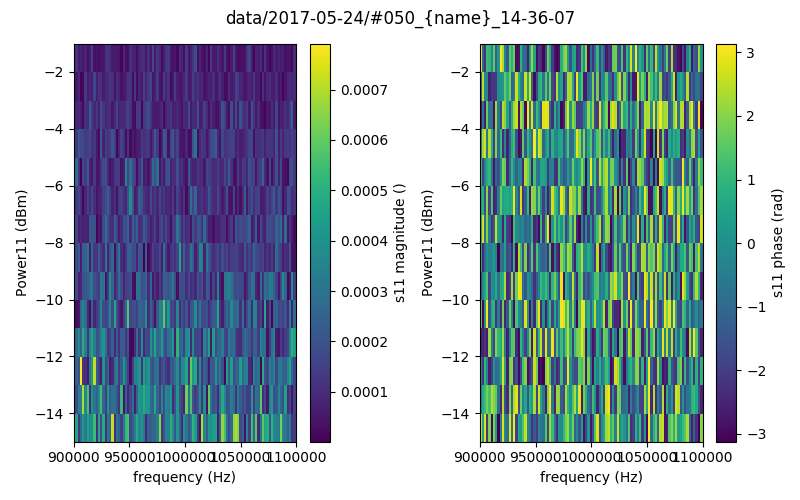

In [20]:
plot = qc.MatPlot(subplots=(1,2))
plot.add(data1.VNA_s11_magnitude, subplot=1)
plot.add(data1.VNA_s11_phase, subplot=2)
plot.fig.tight_layout(rect=(0, 0, 1, 0.95))